In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
audiofeatures = pd.read_csv('audiofeatures.csv')

In [3]:
audiofeatures

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,id
0,0,0.834,0.730,-3.714,0.2220,0.00513,0.000000,0.1240,155.008,2xLMifQCjDGFmkHkpNLD9h
1,1,0.789,0.706,-4.233,0.0429,0.11200,0.000017,0.0586,125.911,2ENexcMEMsYk0rVJigVD3i
2,2,0.706,0.751,-6.323,0.0708,0.17300,0.000000,0.1680,91.031,5vlEg2fT4cFWAqU5QptIpQ
3,3,0.884,0.347,-8.227,0.3500,0.01500,0.000007,0.0871,75.016,5eqK0tbzUPo2SoeZsov04s
4,4,0.656,0.291,-10.572,0.0293,0.87200,0.000000,0.1140,103.971,4RCWB3V8V0dignt99LZ8vH
...,...,...,...,...,...,...,...,...,...,...
6564,6564,0.796,0.877,-4.241,0.0657,0.12000,0.000018,0.1020,104.963,3JU7TK8XomSpjSHDT6VquU
6565,6565,0.516,0.466,-7.075,0.0299,0.38400,0.000305,0.2150,178.013,30rgtGTl30WcfiyDDqo94A
6566,6566,0.671,0.550,-9.660,0.2840,0.01590,0.000734,0.0962,159.991,76bYq5K4mqYK43n1lcMrjB
6567,6567,0.346,0.942,-6.005,0.0722,0.00726,0.062500,0.3440,154.192,3yLXnO1XfG5XwgOLBLhgDa


In [5]:
id_df = audiofeatures[['id']]

id_df.to_csv('id_df.csv', index=False)

In [6]:
# drop the columns 
audiofeatures.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [7]:
audiofeatures

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,0.834,0.730,-3.714,0.2220,0.00513,0.000000,0.1240,155.008
1,0.789,0.706,-4.233,0.0429,0.11200,0.000017,0.0586,125.911
2,0.706,0.751,-6.323,0.0708,0.17300,0.000000,0.1680,91.031
3,0.884,0.347,-8.227,0.3500,0.01500,0.000007,0.0871,75.016
4,0.656,0.291,-10.572,0.0293,0.87200,0.000000,0.1140,103.971
...,...,...,...,...,...,...,...,...
6564,0.796,0.877,-4.241,0.0657,0.12000,0.000018,0.1020,104.963
6565,0.516,0.466,-7.075,0.0299,0.38400,0.000305,0.2150,178.013
6566,0.671,0.550,-9.660,0.2840,0.01590,0.000734,0.0962,159.991
6567,0.346,0.942,-6.005,0.0722,0.00726,0.062500,0.3440,154.192


In [8]:
X = audiofeatures
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,0.834,0.730,-3.714,0.2220,0.00513,0.000000,0.1240,155.008
1,0.789,0.706,-4.233,0.0429,0.11200,0.000017,0.0586,125.911
2,0.706,0.751,-6.323,0.0708,0.17300,0.000000,0.1680,91.031
3,0.884,0.347,-8.227,0.3500,0.01500,0.000007,0.0871,75.016
4,0.656,0.291,-10.572,0.0293,0.87200,0.000000,0.1140,103.971


In [9]:
### Scalling features

In [10]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,0.834,0.730,-3.714,0.2220,0.00513,0.000000,0.1240,155.008
1,0.789,0.706,-4.233,0.0429,0.11200,0.000017,0.0586,125.911
2,0.706,0.751,-6.323,0.0708,0.17300,0.000000,0.1680,91.031
3,0.884,0.347,-8.227,0.3500,0.01500,0.000007,0.0871,75.016
4,0.656,0.291,-10.572,0.0293,0.87200,0.000000,0.1140,103.971
...,...,...,...,...,...,...,...,...
6564,0.796,0.877,-4.241,0.0657,0.12000,0.000018,0.1020,104.963
6565,0.516,0.466,-7.075,0.0299,0.38400,0.000305,0.2150,178.013
6566,0.671,0.550,-9.660,0.2840,0.01590,0.000734,0.0962,159.991
6567,0.346,0.942,-6.005,0.0722,0.00726,0.062500,0.3440,154.192


In [11]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
count,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000,6569.000000
mean,0.618433,0.675207,-6.621456,0.106173,0.163173,0.030983,0.181690,126.039674
std,0.161662,0.177541,2.912128,0.104679,0.212902,0.138352,0.140851,30.082779
min,0.065700,0.016700,-25.247000,0.022900,0.000001,0.000000,0.020800,52.145000
25%,0.495000,0.531000,-8.066000,0.041300,0.017200,0.000000,0.097900,100.832000
50%,0.637000,0.690000,-5.995000,0.067600,0.076600,0.000002,0.119000,124.080000
75%,0.740000,0.817000,-4.614000,0.122000,0.222000,0.000101,0.230000,146.967000
max,0.980000,0.997000,-0.140000,0.950000,0.979000,0.985000,0.994000,213.893000


In [12]:
### K-Means is a distance based algorithm: we need to scale / normalize!:

scaler = StandardScaler()
newscaler = scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,1.333545,0.308643,0.998472,1.106582,-0.742381,-0.223961,-0.409616,0.963027
1,1.055165,0.173453,0.820238,-0.604488,-0.240375,-0.223837,-0.873972,-0.004278
2,0.541708,0.426935,0.102495,-0.337939,0.046163,-0.223961,-0.097206,-1.163833
3,1.642857,-1.848766,-0.551372,2.329458,-0.696018,-0.223910,-0.671615,-1.696238
4,0.232396,-2.164209,-1.356687,-0.734418,3.329610,-0.223961,-0.480618,-0.733654


In [13]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
count,6.569000e+03,6.569000e+03,6.569000e+03,6.569000e+03,6.569000e+03,6.569000e+03,6.569000e+03,6.569000e+03
mean,-1.773923e-16,-2.769051e-16,8.653283e-17,-1.730657e-17,-6.922627e-17,2.595985e-17,2.595985e-17,8.653283e-17
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-3.419337e+00,-3.709320e+00,-6.396341e+00,-7.955619e-01,-7.664723e-01,-2.239606e-01,-1.142361e+00,-2.456565e+00
25%,-7.635874e-01,-8.123081e-01,-4.960820e-01,-6.197736e-01,-6.856840e-01,-2.239606e-01,-5.949323e-01,-8.380074e-01
50%,1.148576e-01,8.332642e-02,2.151360e-01,-3.685110e-01,-4.066615e-01,-2.239494e-01,-4.451172e-01,-6.514767e-02
75%,7.520396e-01,7.987075e-01,6.893958e-01,1.512110e-01,2.763332e-01,-2.232305e-01,3.430091e-01,6.957110e-01
max,2.236735e+00,1.812633e+00,2.225847e+00,8.061685e+00,3.832227e+00,6.896118e+00,5.767591e+00,2.920608e+00


In [ ]:
### Clustering with Kmeans

In [14]:
kmeans = KMeans(n_clusters=18, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=18, random_state=1234)

In [15]:
labels = kmeans.labels_
labels

array([11,  9,  9, ..., 11,  7, 12])

In [16]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

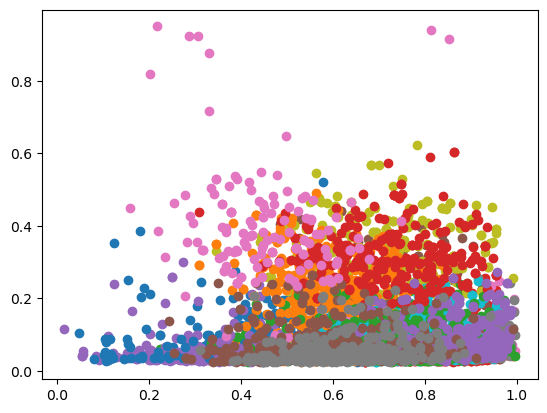

In [17]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [18]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     391
1     481
2     585
3     727
4     197
5     229
6     163
7     289
8     234
9     788
10     52
11    278
12    512
13    279
14    395
15    432
16    136
17    401
Name: count, dtype: int64

In [19]:
clusters

array([11,  9,  9, ..., 11,  7, 12])

In [36]:
#X_df = pd.DataFrame(X)     #### new column in the dataframe for the cluster
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,cluster
0,0.834,0.730,-3.714,0.2220,0.00513,0.000000,0.1240,155.008,11
1,0.789,0.706,-4.233,0.0429,0.11200,0.000017,0.0586,125.911,9
2,0.706,0.751,-6.323,0.0708,0.17300,0.000000,0.1680,91.031,9
3,0.884,0.347,-8.227,0.3500,0.01500,0.000007,0.0871,75.016,11
4,0.656,0.291,-10.572,0.0293,0.87200,0.000000,0.1140,103.971,4
...,...,...,...,...,...,...,...,...,...
6564,0.796,0.877,-4.241,0.0657,0.12000,0.000018,0.1020,104.963,9
6565,0.516,0.466,-7.075,0.0299,0.38400,0.000305,0.2150,178.013,2
6566,0.671,0.550,-9.660,0.2840,0.01590,0.000734,0.0962,159.991,11
6567,0.346,0.942,-6.005,0.0722,0.00726,0.062500,0.3440,154.192,7


In [22]:
# saving the csv for the x cluster

#X.to_csv('X_df.csv')

In [23]:
X[X['cluster'] == 1].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,cluster
160,0.811,0.553,-6.644,0.0552,0.317,0.0,0.105,148.014,1


In [24]:
kmeans.inertia_ ### total error of our model

15773.982355566995

In [25]:
# this the parameters to pass inside the cluster
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",  # to initialize the sample 
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...    default is 10 
                max_iter=1,
                tol=0,
                algorithm="elkan", # not relevant 
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

38520.44151225478


Training a K-Means model with 2 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 3 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 8 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 9 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 10 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 11 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 12 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 13 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 14 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 15 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 16 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 17 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 18 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 19 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 20 clusters! 



C:\Users\calum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

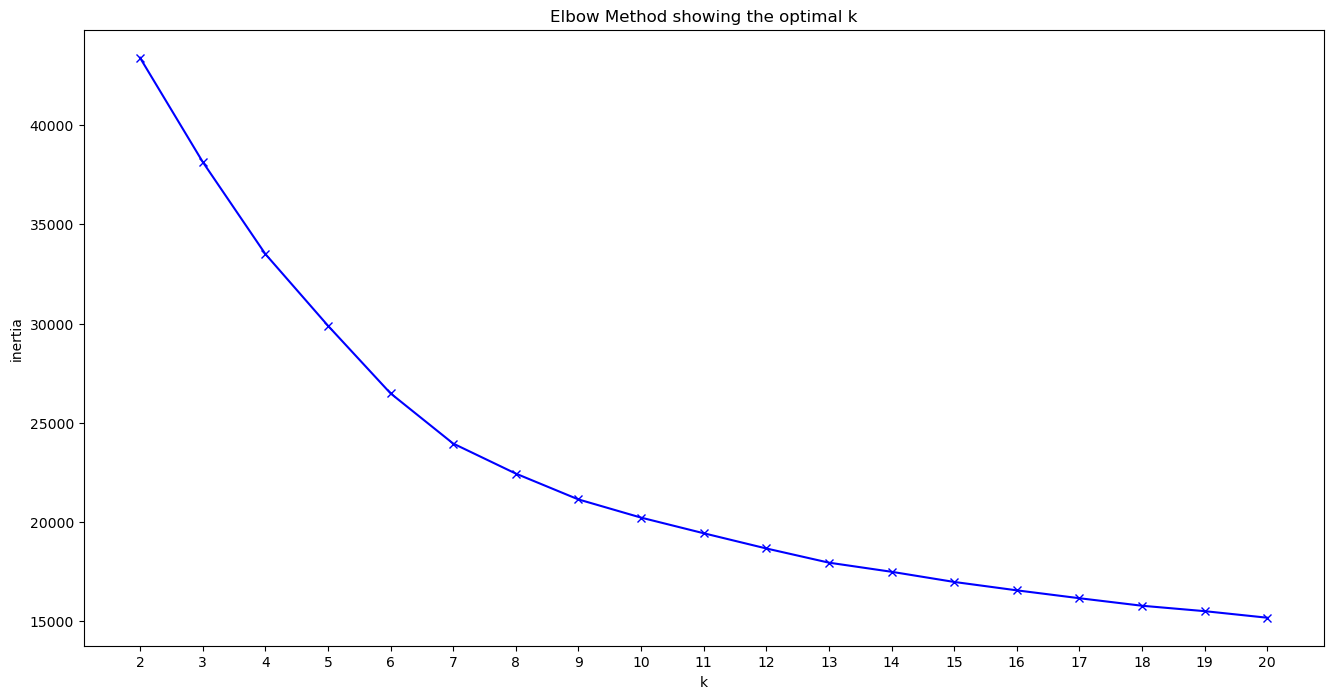

In [26]:
###### chosing K

K = range(2, 21) # starts in 2 cluster to 21 
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)  # append to the list of inertia

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

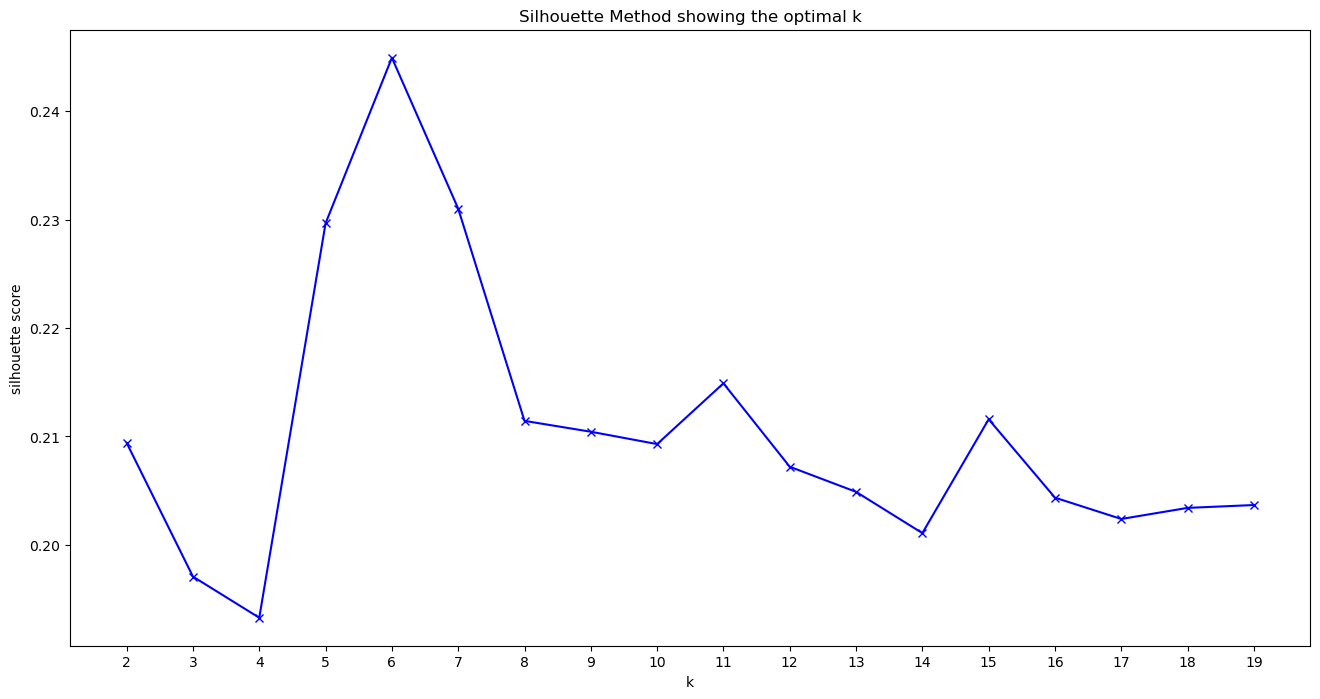

In [27]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [28]:
def save(kmeans, filename="spotify_model.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(kmeans, f)

In [29]:
# Saving a k-means model
save(kmeans, "spotify_model.pickle")

In [30]:
def save(newscaler, filename="newscaler.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(newscaler, f)

In [31]:
# Saving a newscaler
save(scaler, "newscaler.pickle")

In [37]:
new_scaled_df = pd.concat([X, id_df], axis=1)

In [38]:
new_scaled_df.to_csv('new_df.csv')